In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('./data/CVD_cleaned.csv')
df

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
df.Heart_Disease.value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

In [ ]:
pos = df[df['Heart_Disease']=='Yes']
neg = df[df['Heart_Disease']=='No']

new_neg = neg.sample(n=24971, random_state=4)

dfa = pd.concat([pos, new_neg]).sample(frac=1, random_state=4).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

# DATA ANALYSIS

In [ ]:
def data_plots(data: pd.DataFrame, 
               x: str,
               y: str= None,
               title: str = None,
               xlabel: str = None,
               ylabel: str = None,
               hue: str = None,
               order: list = None) -> None:
    
    # define size
    plt.figure(figsize=(10, 5))
    
    # define countplot method
    sns.countplot(x=x, y=y, data=data, hue=hue, order=order)
    
    # add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xticks(rotation=45, ha='right')


In [ ]:
def cat_plots(data: pd.DataFrame, 
              x: str, 
              col: str, 
              hue: str,
              title: str,
              xlabel: str,
              ylabel: str,
              col_wrap: int = 2, 
              order: list = None,
              kind: str = 'count') -> None:
    
    # Define catplot method
    fctgrid = sns.catplot(data=data, x=x, hue=hue, col=col, kind=kind, height=6, aspect=1.2, col_wrap=col_wrap, order=order)
    
    # Add titles and labels
    fctgrid.fig.subplots_adjust(top=0.9)
    fctgrid.fig.suptitle(title, fontsize=16)
    fctgrid.set_axis_labels(xlabel, ylabel)
    
    # Show plot
    plt.show()


# COMPARED TO HEART DISEASE

## CHECKUP FREQUENCY

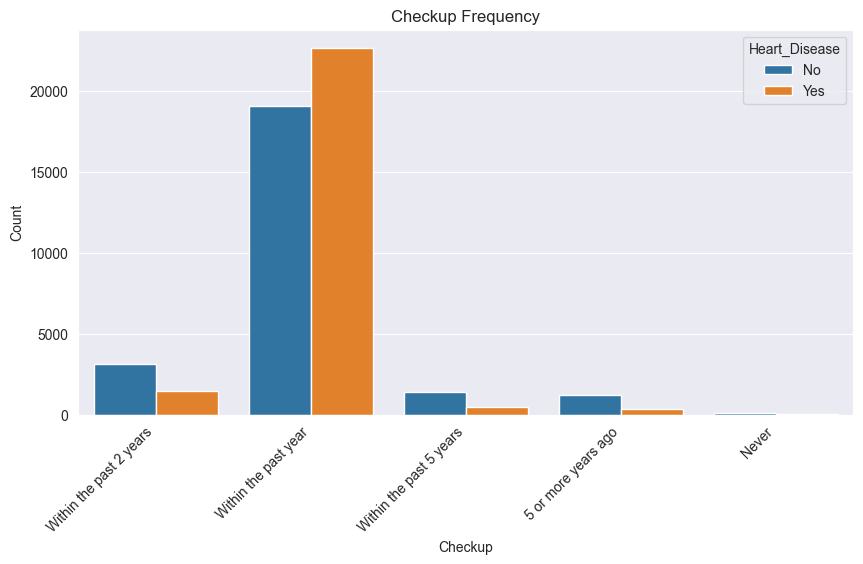

In [ ]:
data_plots(dfa, x='Checkup', title='Checkup Frequency', xlabel='Checkup', ylabel='Count', hue='Heart_Disease')

## Exercise

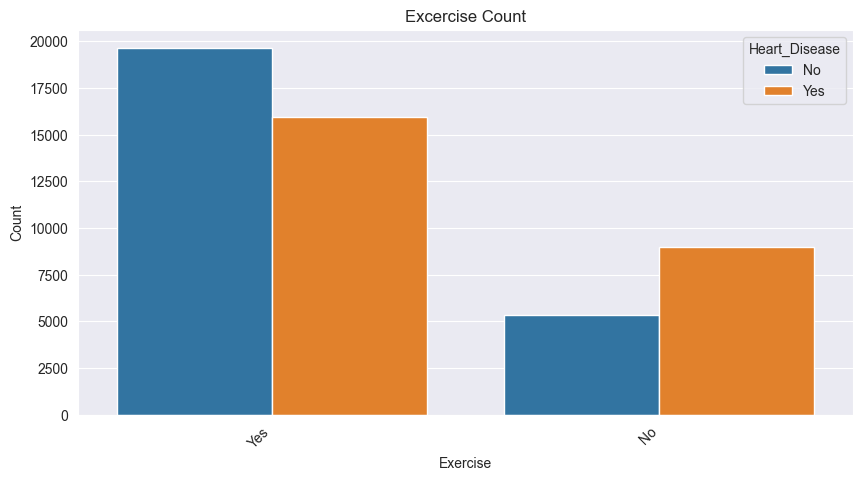

In [ ]:
data_plots(dfa, x='Exercise', title='Excercise Count', xlabel='Exercise', ylabel='Count', hue='Heart_Disease')

## Skin Cancer

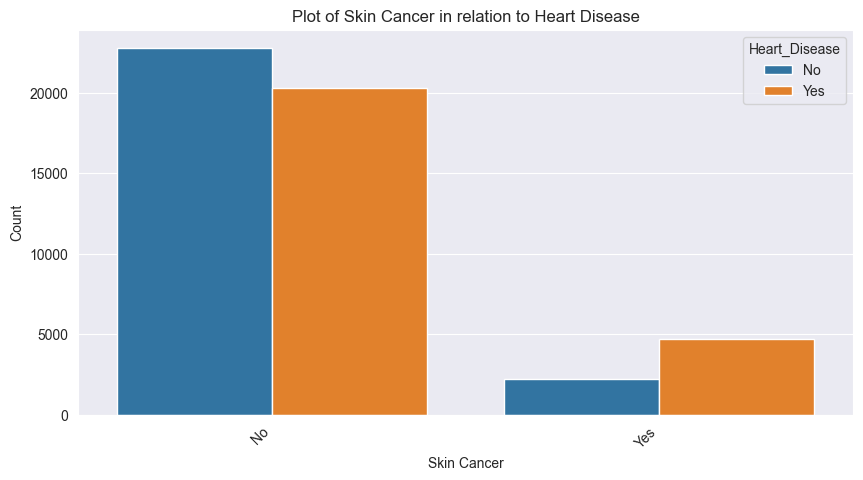

In [ ]:
skin = df[df['Skin_Cancer']=='Yes']
data_plots(dfa, x='Skin_Cancer', title='Plot of Skin Cancer in relation to Heart Disease', xlabel='Skin Cancer', ylabel='Count', hue='Heart_Disease')

## Other Cancer

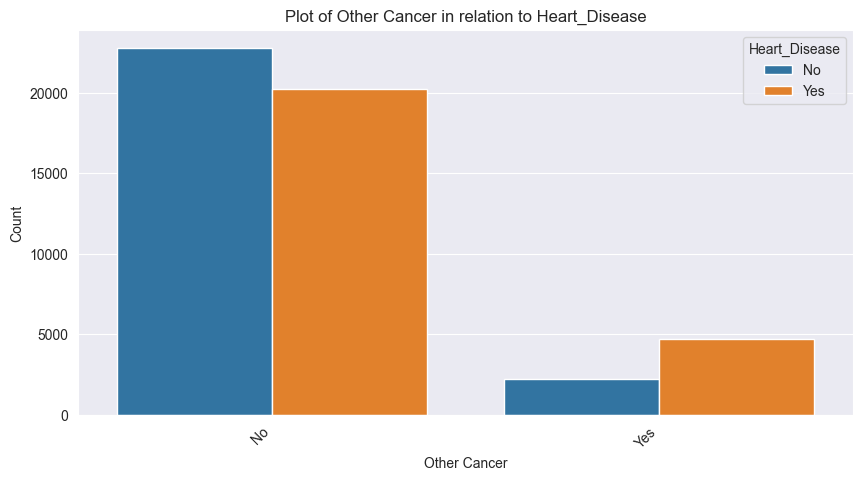

In [ ]:
data_plots(dfa, x='Other_Cancer', title='Plot of Other Cancer in relation to Heart_Disease', xlabel='Other Cancer', ylabel='Count', hue='Heart_Disease')

## Depression

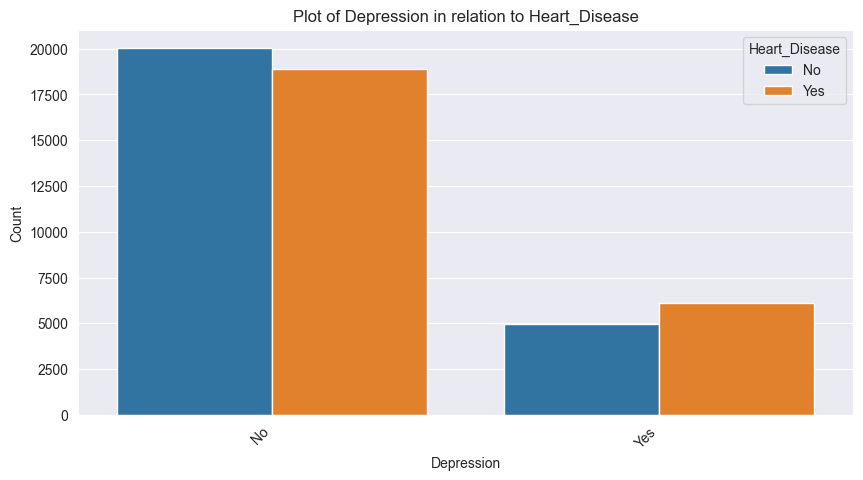

In [ ]:
data_plots(dfa, x='Depression', title='Plot of Depression in relation to Heart_Disease', xlabel='Depression', ylabel='Count', hue='Heart_Disease')

## Diabetes

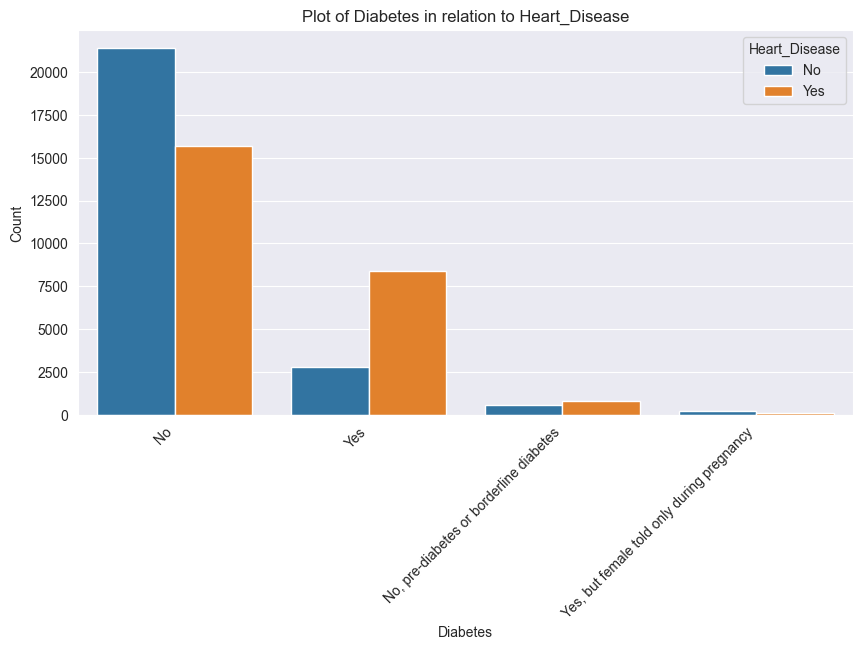

In [ ]:
data_plots(dfa, x='Diabetes', title='Plot of Diabetes in relation to Heart_Disease', xlabel='Diabetes', ylabel='Count', hue='Heart_Disease')  

## Arthritis

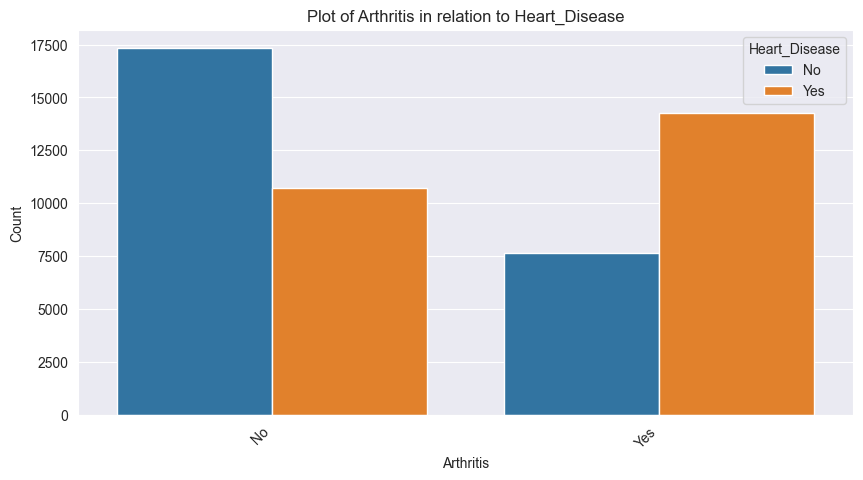

In [ ]:
data_plots(dfa, x='Arthritis', title='Plot of Arthritis in relation to Heart_Disease', xlabel='Arthritis', ylabel='Count', hue='Heart_Disease')

# Age

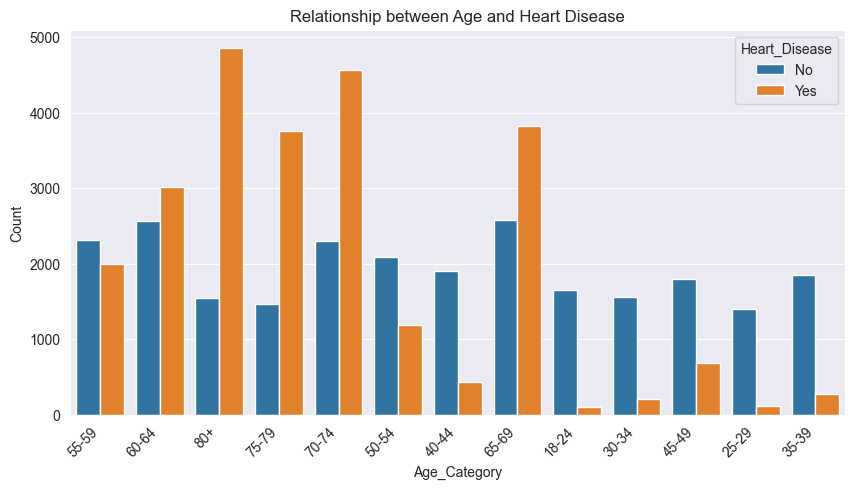

In [ ]:
data_plots(dfa, x='Age_Category', title='Relationship between Age and Heart Disease', xlabel='Age_Category', ylabel='Count', hue='Heart_Disease')

## SMOKING

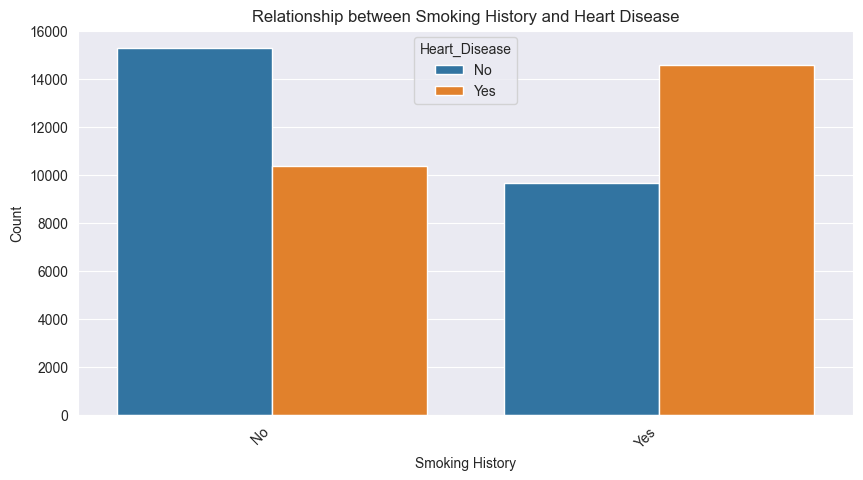

In [ ]:
data_plots(dfa, x='Smoking_History', title='Relationship between Smoking History and Heart Disease', xlabel='Smoking History', ylabel='Count', hue='Heart_Disease')

## ALCOHOL

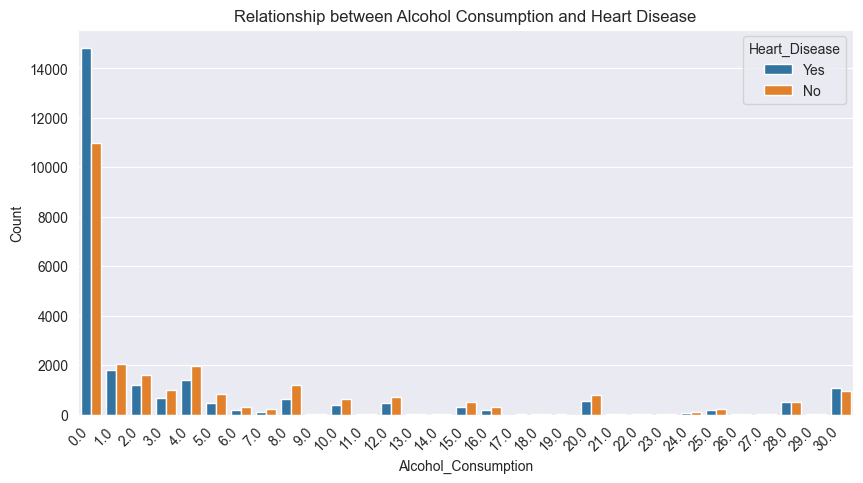

In [ ]:
data_plots(dfa, x='Alcohol_Consumption', title='Relationship between Alcohol Consumption and Heart Disease', xlabel='Alcohol_Consumption', ylabel='Count', hue='Heart_Disease')

## FRUIT CONSUMPTION

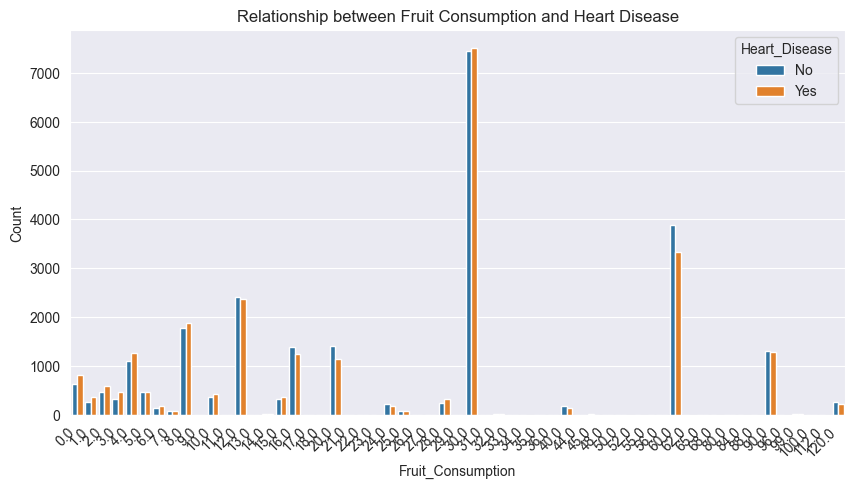

In [ ]:
data_plots(dfa, x='Fruit_Consumption', title='Relationship between Fruit Consumption and Heart Disease', xlabel='Fruit_Consumption', ylabel='Count', hue='Heart_Disease')

## HEIGHT

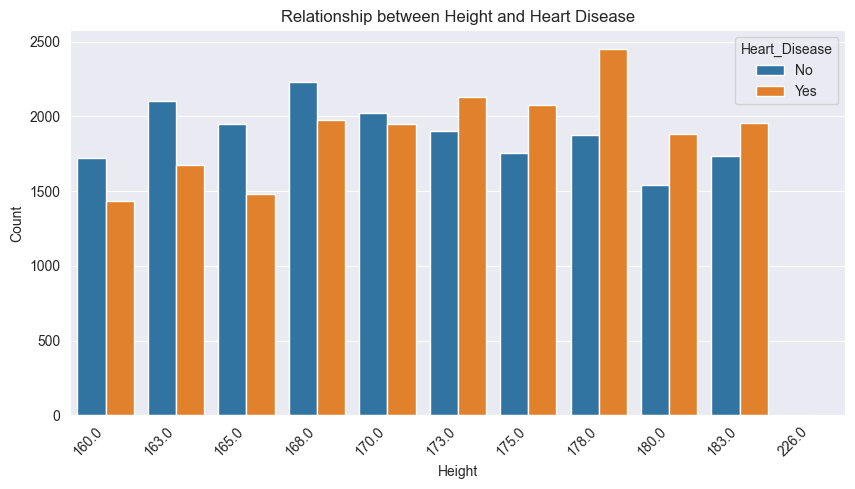

In [ ]:
height_order = [160.0, 163.0, 165.0, 168.0, 170.0, 173.0, 175.0, 178.0, 180.0, 183.0, 226.0]
data_plots(dfa, x='Height_(cm)', title='Relationship between Height and Heart Disease', xlabel='Height', ylabel='Count', hue='Heart_Disease', order=height_order)


# TWO COLUMN COMPARISON WITH HEART DISEASE AS HUE

## WEIGHT AND BMI

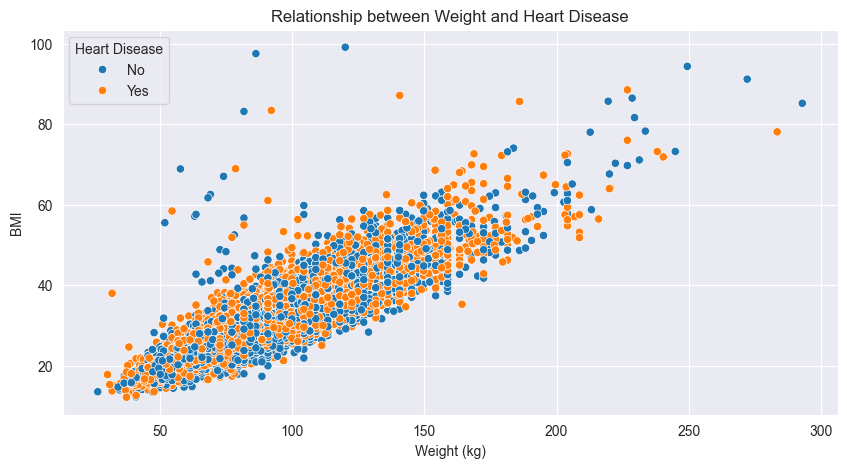

In [ ]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=dfa, x='Weight_(kg)', y='BMI', hue='Heart_Disease')

# Add titles and labels
plt.title('Relationship between Weight and Heart Disease')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.legend(title='Heart Disease')

# Show plot
plt.show()


## AGE AND SEX

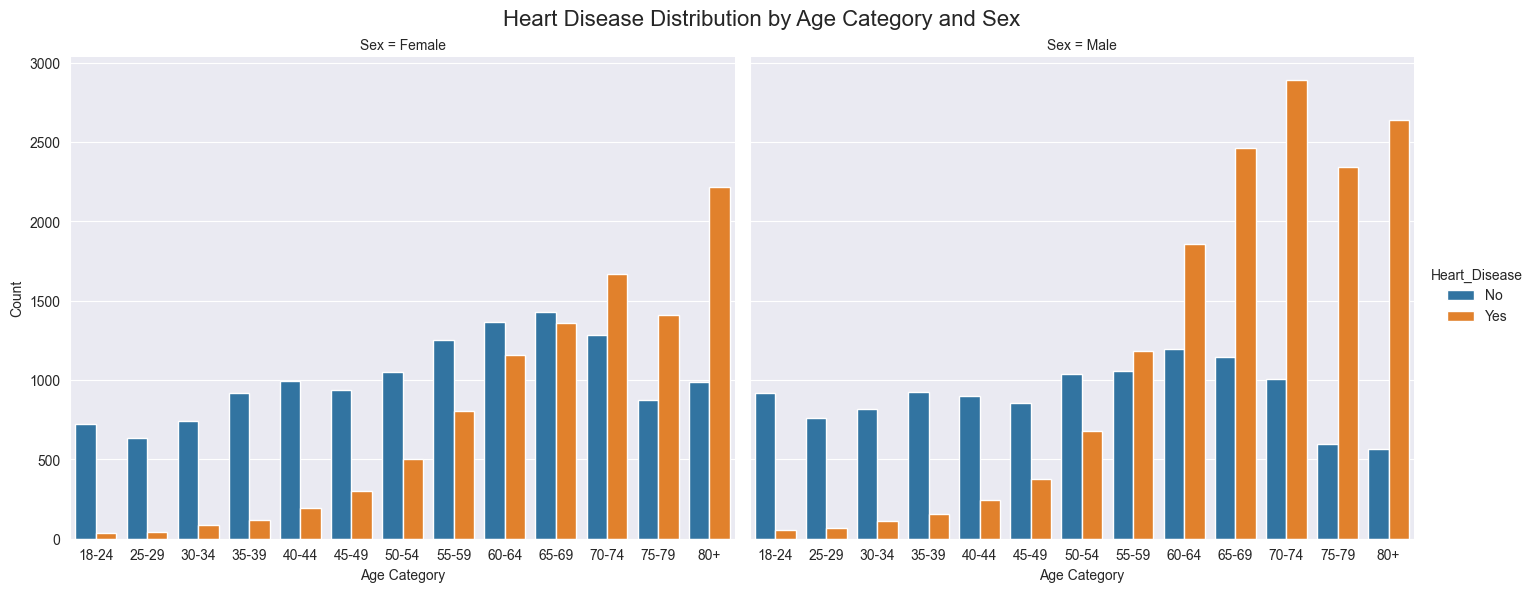

In [ ]:
# define age order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

cat_plots(data=dfa, 
          x='Age_Category',
          col='Sex',
          hue='Heart_Disease',
          title='Heart Disease Distribution by Age Category and Sex',
          xlabel='Age Category',
          ylabel='Count',
          order=age_order)

## SMOKING AND SKIN CANCER

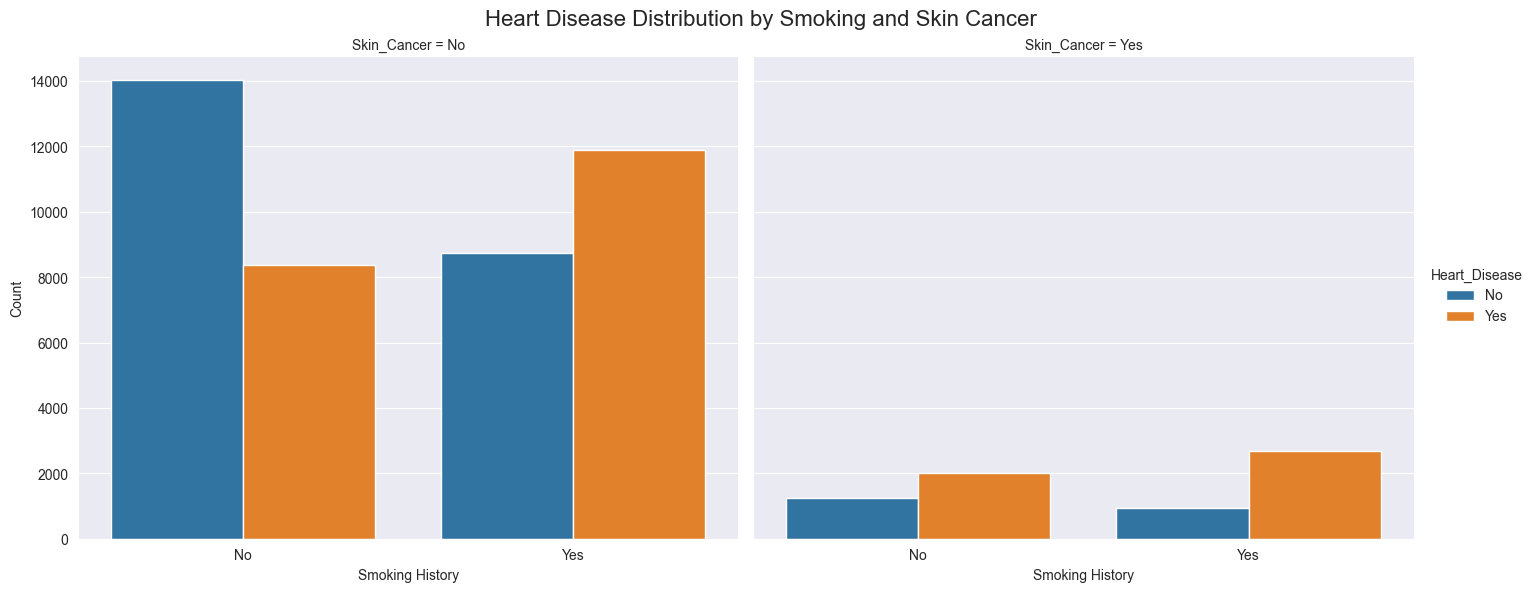

In [ ]:
cat_plots(data=dfa, 
          x='Smoking_History', 
          col='Skin_Cancer', 
          hue='Heart_Disease', 
          title='Heart Disease Distribution by Smoking and Skin Cancer', 
          xlabel='Smoking History',
          ylabel='Count')

## WEIGHT AND DIABETES

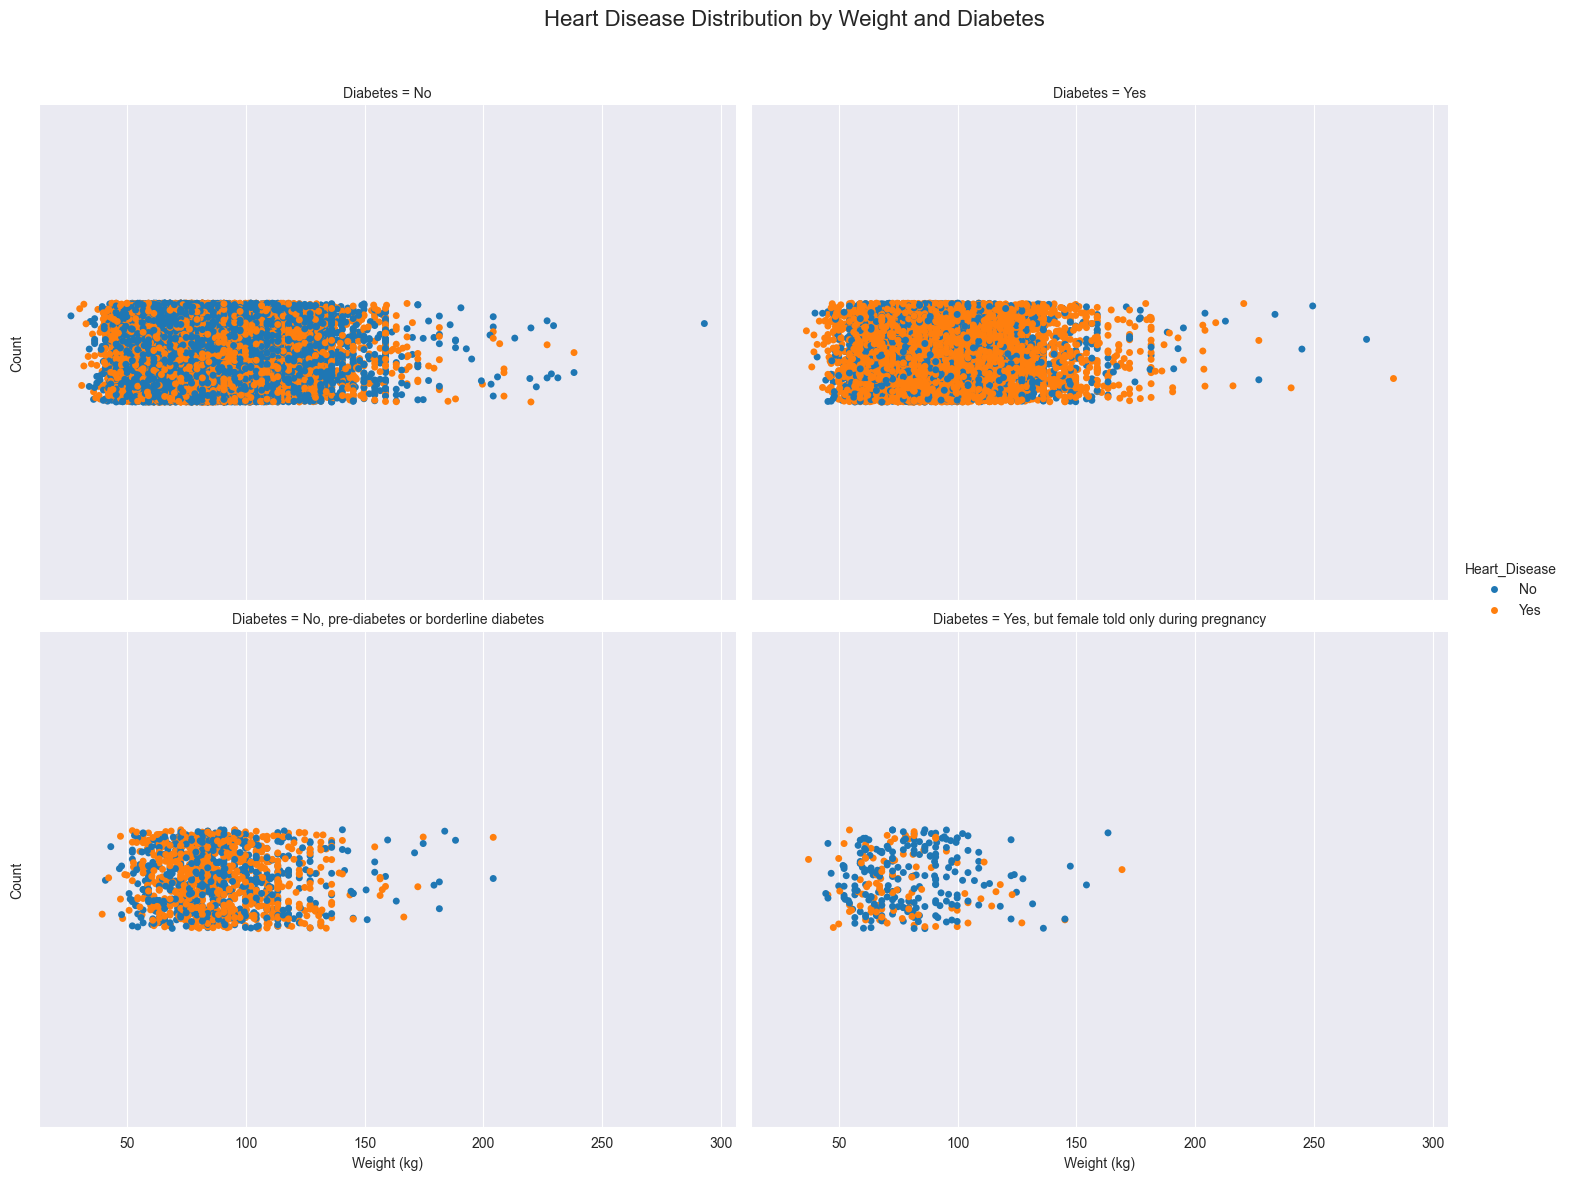

In [ ]:
cat_plots(data=dfa, 
          x='Weight_(kg)', 
          col='Diabetes', 
          hue='Heart_Disease', 
          title='Heart Disease Distribution by Weight and Diabetes', 
          xlabel='Weight (kg)',
          ylabel='Count',
          col_wrap=2,
          kind='strip')

# CORRELATION HEATMAP

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')

In [ ]:
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,36,9,77,1,0,30,16,12
1,4,4,0,1,0,0,0,2,0,0,10,51,145,1226,0,0,30,0,4
2,4,4,1,0,0,0,0,2,0,0,8,49,180,1682,0,4,12,3,16
3,3,4,1,1,0,0,0,2,0,1,11,66,195,1267,0,0,30,30,8
4,2,4,0,0,0,0,0,0,0,1,12,77,180,868,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,1,54,159,1295,0,4,30,8,0
308850,1,3,1,0,0,0,0,2,0,1,9,66,121,604,0,8,15,48,4
308851,4,0,1,0,0,0,1,3,0,0,2,43,94,898,1,4,40,8,4
308852,4,4,1,0,0,0,0,0,0,1,9,69,152,810,0,3,30,12,0


plt.figure(figsize=(12, 7))
heat = sns.heatmap(dfa.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heat

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

# FEATURE SELECTION

In [ ]:
col_select = ['Age_Category', 'Arthritis', 'Smoking_History', 'Diabetes', 'Heart_Disease', 'Exercise', 'Sex', 'BMI']
dfa = df[col_select]

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Age_Category     308854 non-null  int32
 1   Arthritis        308854 non-null  int32
 2   Smoking_History  308854 non-null  int32
 3   Diabetes         308854 non-null  int32
 4   Heart_Disease    308854 non-null  int32
 5   Exercise         308854 non-null  int32
 6   Sex              308854 non-null  int32
 7   BMI              308854 non-null  int64
dtypes: int32(7), int64(1)
memory usage: 10.6 MB


In [ ]:
X = dfa.drop('Heart_Disease', axis=1)
y = dfa.Heart_Disease

In [ ]:
X

,Age_Category,Arthritis,Smoking_History,Diabetes,Exercise,Sex,BMI
0,10,1,1,0,0,0,77
1,10,0,0,2,0,0,1226
2,8,0,0,2,1,0,1682
3,11,0,0,2,1,1,1267
4,12,0,1,0,0,1,868
...,...,...,...,...,...,...,...
308849,1,0,0,0,1,1,1295
308850,9,0,0,2,1,1,604
308851,2,0,1,3,1,0,898
308852,9,0,0,0,1,1,810


In [ ]:
y

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308854, dtype: int32

# MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [ ]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=728)

In [ ]:
import hpsklearn
dir(hpsklearn)

['HyperoptEstimator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ada_boost_classifier',
 'ada_boost_regressor',
 'all_classifiers',
 'all_preprocessing',
 'all_regressors',
 'any_classifier',
 'any_preprocessing',
 'any_regressor',
 'any_sparse_classifier',
 'any_sparse_preprocessing',
 'any_sparse_regressor',
 'any_text_preprocessing',
 'ard_regression',
 'bagging_classifier',
 'bagging_regressor',
 'bayesian_gaussian_mixture',
 'bayesian_ridge',
 'bernoulli_nb',
 'binarizer',
 'categorical_nb',
 'cca',
 'cluster',
 'colkmeans',
 'complement_nb',
 'components',
 'compose',
 'covariance',
 'cross_decomposition',
 'decision_tree_classifier',
 'decision_tree_regressor',
 'decomposition',
 'discriminant_analysis',
 'dummy',
 'dummy_classifier',
 'dummy_regressor',
 'elastic_net',
 'elastic_net_cv',
 'elliptic_envelope',
 'ensemble',
 'estimator',
 'extra_tree_classifier',
 'extra_tree_regressor',
 'extra

In [ ]:
from hpsklearn import (
    HyperoptEstimator, 
    logistic_regression,
    random_forest_classifier,
    decision_tree_classifier,
    extra_trees_classifier,
    extra_tree_classifier,
    ada_boost_classifier,
    xgboost_classification,
    lightgbm_classification
)

In [ ]:
import time
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def models(X_train: pd.DataFrame,
           X_test: pd.DataFrame,
           y_train:pd.Series,
           y_test: pd.Series):
    
    # Define a list of models to train, including their names and classes
    k = 65
    lr = LogisticRegression(max_iter=1000, random_state=k)
    rf = RandomForestClassifier(random_state=k)
    dtc = DecisionTreeClassifier(random_state=k)
    xgb = XGBClassifier(random_state=k)
    et = ExtraTreeClassifier(random_state=k)
    ets = ExtraTreesClassifier(random_state=k)
    aboost = AdaBoostClassifier(random_state=k)
    lgb = LGBMClassifier(random_state=k)
    
    
    model_list = [('Logistic Regression', lr),
                  ('Random Forest', rf),
                  ('Decision Tree', dtc),
                  ('Extra Tree', et),
                  ('Extra Trees', ets),
                  ('AdaBoost', aboost),
                  ('XGBoost', xgb),
                  ('LightGBM', lgb)
                  ]
    
    scores_df = pd.DataFrame()  # Create an empty DataFrame to store evaluation scores
    
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    print('Starting loop')
    import logging
    for model_name, model in model_list:
        logging.info(model_name)
        print(f'Training {model_name}', end=' - Time taken to train (s): ')
        
        start_time = time.time()  # Record start time before training the model

        model.fit(X_train, y_train)  # Train the model

        end_time = time.time()  # Record end time after training the model
        total_time = end_time - start_time
        
        print(total_time)  # Print the time taken to train the model

        model_pred = model.predict(X_test)  # Make predictions on the test data

        # Evaluate the model's performance and store the scores in the DataFrame
        scores_df[model_name] =  [accuracy_score(y_test, model_pred),
                                  balanced_accuracy_score(y_test, model_pred),
                                  precision_score(y_test, model_pred, average='weighted'),
                                  recall_score(y_test, model_pred, average='weighted'),
                                  f1_score(y_test, model_pred, average='weighted')]

    return scores_df
        

In [ ]:
Xtr

,Age_Category,Arthritis,Smoking_History,Diabetes,Exercise,Sex,BMI
174056,4,0,0,0,1,1,492
300702,12,1,1,2,1,0,898
114302,6,0,0,0,1,0,1495
250183,12,0,1,2,1,0,546
7886,9,0,1,0,0,0,708
...,...,...,...,...,...,...,...
84785,2,0,0,0,1,0,1998
59699,2,0,0,0,1,0,675
154204,12,1,1,2,0,0,1148
188488,8,1,1,0,1,0,407


In [ ]:
scores = models(Xtr,Xte,ytr,yte)

Starting loop
Training Logistic Regression - Time taken to train (s): 5.045225620269775
Training Random Forest - Time taken to train (s): 14.91666030883789
Training Decision Tree - Time taken to train (s): 0.3757178783416748
Training Extra Tree - Time taken to train (s): 0.09376239776611328
Training Extra Trees - Time taken to train (s): 9.536960124969482
Training AdaBoost - Time taken to train (s): 

C:\Users\USER\anaconda3\envs\cardiovascular\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


3.8231425285339355
Training XGBoost - Time taken to train (s): 1.441112995147705
Training LightGBM - Time taken to train (s): [LightGBM] [Info] Number of positive: 19936, number of negative: 227147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 247083, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080685 -> initscore=-2.433070
[LightGBM] [Info] Start training from score -2.433070
0.5534706115722656


In [ ]:
scores

,Logistic Regression,Random Forest,Decision Tree,Extra Tree,Extra Trees,AdaBoost,XGBoost,LightGBM
0,0.917826,0.890402,0.891049,0.891713,0.891842,0.917858,0.918263,0.918392
1,0.508778,0.547692,0.542072,0.541076,0.543590,0.512325,0.503768,0.500128
2,0.878714,0.868674,0.867077,0.866930,0.867776,0.881099,0.879191,0.859942
3,0.917826,0.890402,0.891049,0.891713,0.891842,0.917858,0.918263,0.918392
4,0.882186,0.878498,0.877848,0.878013,0.878535,0.883320,0.880689,0.879480


In [ ]:
ytr.value_counts()